In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [3]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

cols = ['Length','Diameter','Height','Whole weight','Shucked weight', 'Viscera weight', 'Shell weight', 'rings']

for col in cols:
    df[col] = scale.fit_transform(df[col][:,np.newaxis])

/tmp/ipykernel_12429/1833360668.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df[col] = scale.fit_transform(df[col][:,np.newaxis])
/tmp/ipykernel_12429/1833360668.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df[col] = scale.fit_transform(df[col][:,np.newaxis])
/tmp/ipykernel_12429/1833360668.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df[col] = scale.fit_transform(df[col][:,np.newaxis])
/tmp/ipykernel_12429/1833360668.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Conve

In [4]:
df.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [5]:
df = df[(df.Sex == 'M') | (df.Sex == 'F')]
df.Sex.unique()

array(['M', 'F'], dtype=object)

In [6]:
for col in cols:
    Q1 = np.percentile(df[col], 25, axis=0)
    Q3 = np.percentile(df[col], 75, axis=0)
    IQR = Q3 - Q1
    upperlimit = Q3 + IQR *1.5
    lowerlimit = Q1 - IQR *1.5
    df = df[(df[col] < upperlimit) | (df[col] > lowerlimit)]

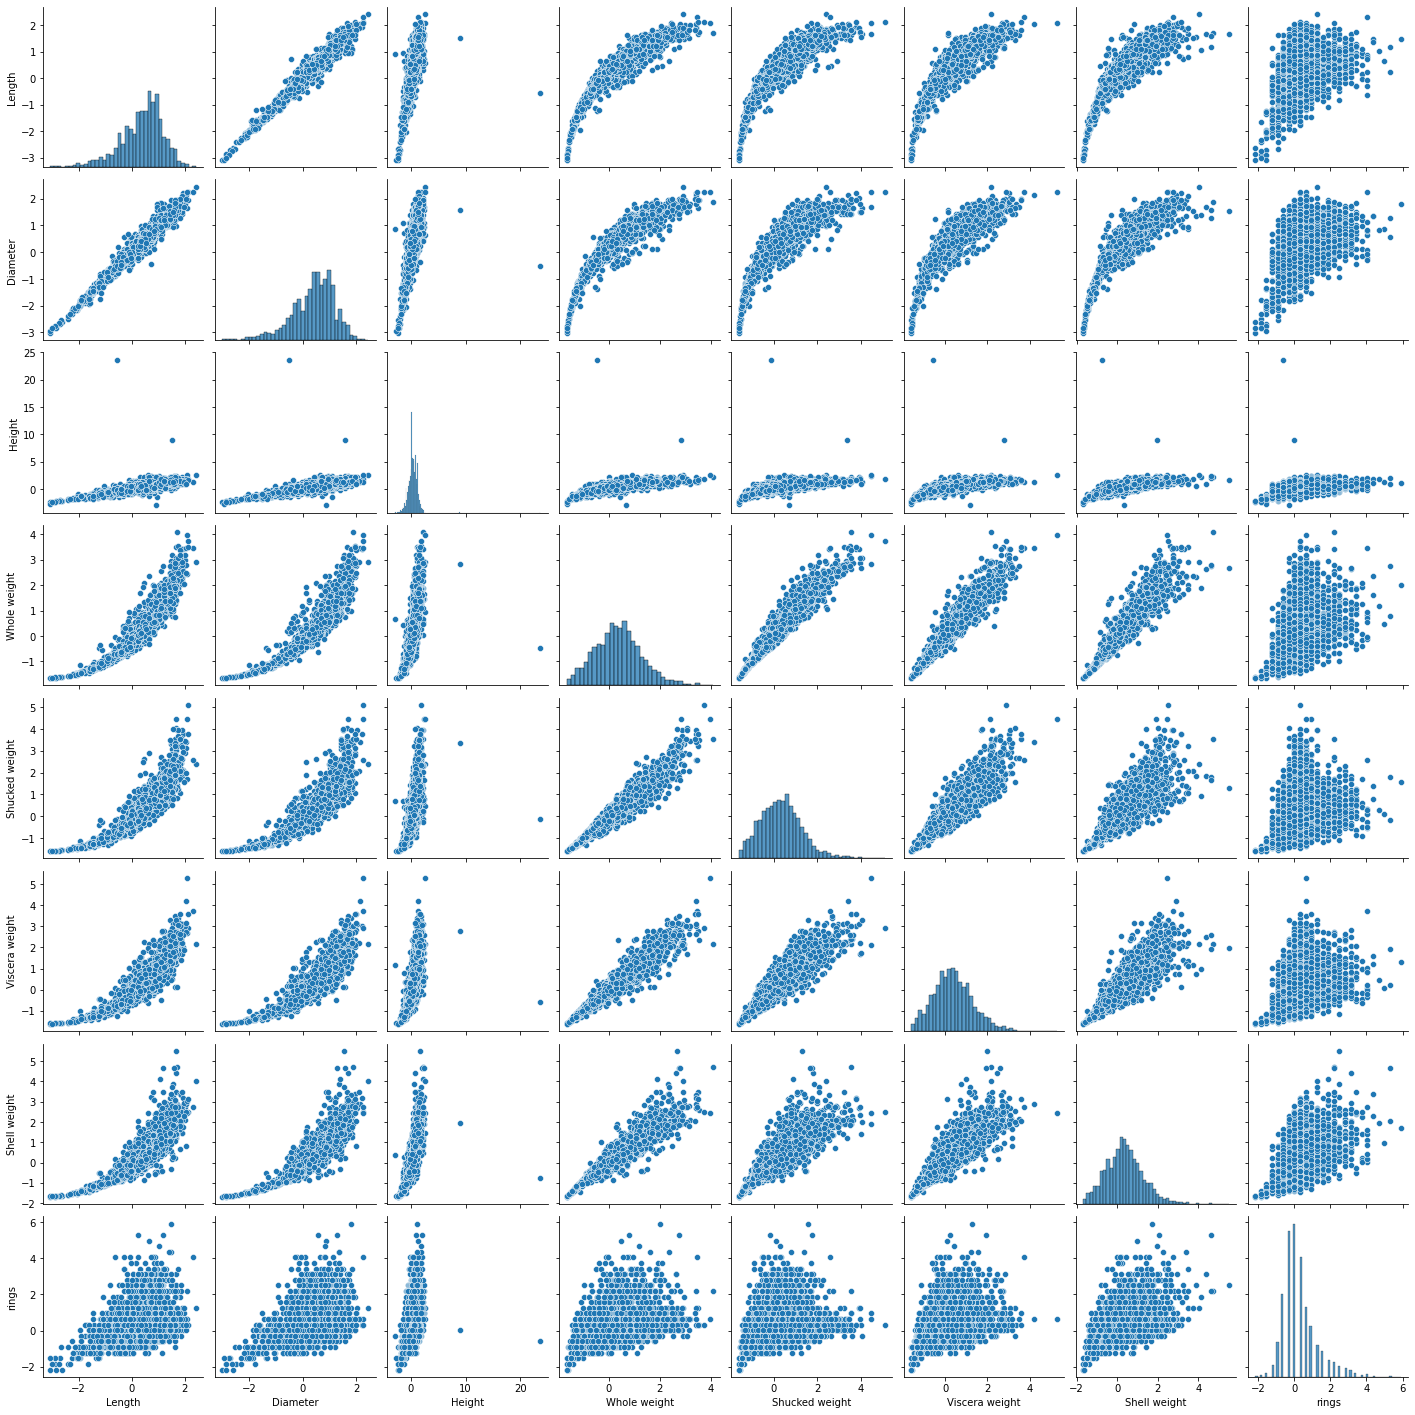

In [7]:
sns.pairplot(df)

<AxesSubplot:>

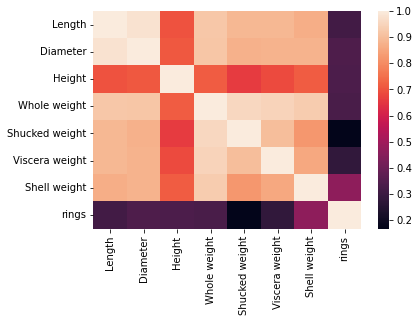

In [8]:
corr_col = df.drop(['Sex'], axis=1)
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

In [9]:
df = df.replace('M', 1)
df = df.replace('F', 0)

Text(0, 0.5, 'diameter')

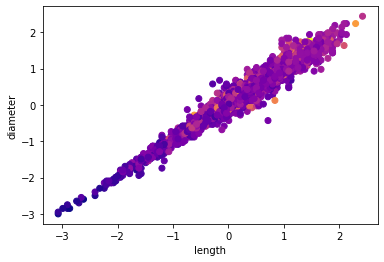

In [10]:
plt.scatter(df['Length'], df['Diameter'], c=df['rings'], cmap='plasma')
plt.xlabel('length'); plt.ylabel('diameter')

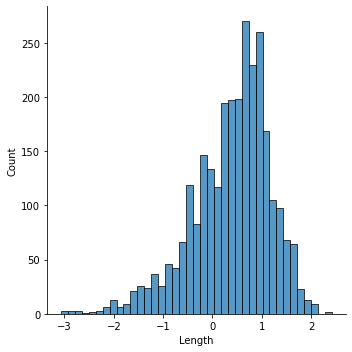

In [11]:
sns.displot(df['Length'])

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(['rings'], axis = 1)
y = df.rings

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
random = RandomForestRegressor()
neigh = KNeighborsRegressor()
line_reg = LinearRegression()
# logi = LogisticRegression()
models = [random, neigh, line_reg]

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(f'{model}: {r2_score(y_test, prediction)}\t{mean_absolute_error(y_test, prediction)}')

RandomForestRegressor(): 0.4019700719030167	0.5345117650010875
KNeighborsRegressor(): 0.30191547738476177	0.5759089584543275
LinearRegression(): 0.3837913263338645	0.5533470226251045


In [15]:
import pickle
pickle.dump(line_reg, open('linear_regression.pkl', 'wb'))

In [16]:
X_train.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
1734,1,1.215937,0.978743,0.489780,0.876466,1.199139,1.189827,0.496955
713,1,-1.407346,-1.439929,-1.303532,-1.280243,-1.308337,-1.164163,-1.216580
1714,0,1.007740,1.029133,1.207105,1.089588,0.962584,1.655151,0.870555
3078,0,1.424134,1.281078,1.446213,1.543363,1.386129,1.399679,1.668049
1337,1,0.466427,0.525242,0.370226,1.245605,1.406405,0.843115,0.407147
